# Basic DPF-Core usage {#ref_basic_example}

This example shows how to open a result file and do some basic
postprocessing.

If you have Ansys 2021 R1 or higher installed, starting DPF is quite
easy as DPF-Core takes care of launching all the services that are
required for postprocessing Ansys files.


In [1]:
# First, import the DPF-Core module as ``dpf`` and import the included examples file.
from ansys.dpf import core as dpf
from ansys.dpf.core import examples

Next, open an example and print out the `model` object. The
`Model <ansys.dpf.core.model.Model>`{.interpreted-text role="class"}
class helps to organize access methods for the result by keeping track
of the operators and data sources used by the result file.

Printing the model displays:

-   Analysis type
-   Available results
-   Size of the mesh
-   Number of results

Also, note that the first time you create a DPF object, Python
automatically attempts to start the server in the background. If you
want to connect to an existing server (either local or remote), use
`ansys.dpf.core.connect_to_server`{.interpreted-text role="func"}.


In [2]:
model = dpf.Model(examples.find_simple_bar())
print(model)

DPF Model
------------------------------
Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  element_nodal_forces: ElementalNodal Element nodal Forces
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  structural_temperature: ElementalNodal Temperature
------------------------------
DPF  Meshed Region: 
  3751 nodes 
  3000 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 1 
Cumulative     Time (s)       LoadStep       Substep         
1              1.000000       1        

# Model metadata

Specific metadata can be extracted from the model by referencing the
model\'s `metadata` property. For example, to print only the
`result_info`:


In [3]:
metadata = model.metadata
print(metadata.result_info)

Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  element_nodal_forces: ElementalNodal Element nodal Forces
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  structural_temperature: ElementalNodal Temperature



Print the mesh region:


In [4]:
print(metadata.meshed_region)

DPF  Meshed Region: 
  3751 nodes 
  3000 elements 
  Unit: m 
  With solid (3D) elements


Print the time or frequency of the results:


In [5]:
print(metadata.time_freq_support)

DPF  Time/Freq Support: 
  Number of sets: 1 
Cumulative     Time (s)       LoadStep       Substep         
1              1.000000       1              1               



# Extract displacement results

All results of the model can be accessed through the `results` property,
which returns the `ansys.dpf.core.results.Results`{.interpreted-text
role="class"} class. This class contains the DPF result operators
available to a specific result file, which are listed when printing the
object with `print(results)`.

Here, the `'U'` operator is connected with `data_sources`, which takes
place automatically when running `results.displacement()`. By default,
the `'U'` operator is connected to the first result set, which for this
static result is the only result.


In [6]:
results = model.results
displacements = results.displacement()
fields = displacements.outputs.fields_container()

# Finally, extract the data of the displacement field:
disp = fields[0].data
disp

DPFArray([[-1.22753781e-08, -1.20861254e-06, -5.02681396e-06],
          [-9.46666013e-09, -1.19379712e-06, -4.64249826e-06],
          [-1.22188426e-08, -1.19494216e-06, -4.63117832e-06],
          ...,
          [-1.35911608e-08,  1.52559428e-06, -4.29246409e-06],
          [-1.91212290e-08,  1.52577102e-06, -4.28782940e-06],
          [-2.69632909e-08,  1.52485289e-06, -4.27831232e-06]])

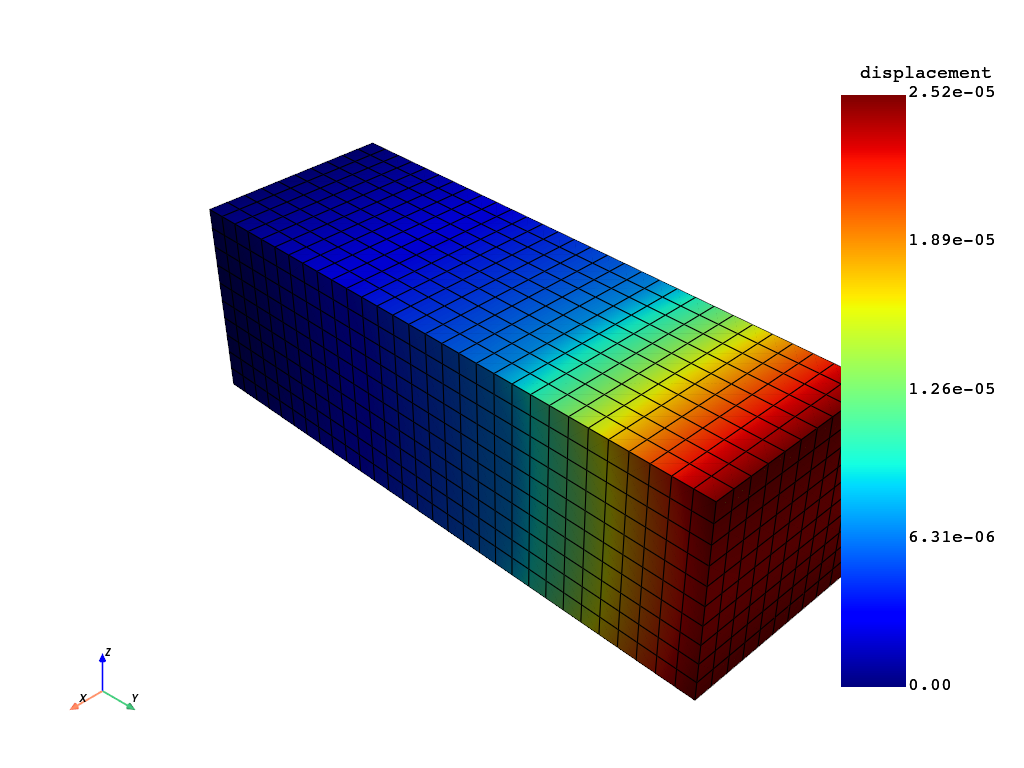

In [7]:
model.metadata.meshed_region.plot(fields)